### <font color='blue'>Objetivo do Projeto: Identificar fatores latentes que mais influenciam o ataque cardíaco do paciente.

link df: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

### <font color='blue'>Instalando e Carregando os pacotes

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt

### <font color='blue'>Carregando os Dados

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Movendo a coluna NumberOfPurchases
df = pd.concat([df['output'], df.drop('output', axis=1)], axis=1)

In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   output    303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trtbps    303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalachh  303 non-null    int64  
 9   exng      303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slp       303 non-null    int64  
 12  caa       303 non-null    int64  
 13  thall     303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Shape
df.shape

(303, 14)

### <font color='blue'>Verificando a Adequação dos Dados com o Teste de Bartlett

A função calculate_bartlett_sphericity() é frequentemente usada no contexto da Análise Fatorial para testar a hipótese de esfericidade de Bartlett. A esfericidade refere-se à adequação dos dados para a análise fatorial. Se os dados são perfeitamente esféricos, isso indica que a análise fatorial pode não ser adequada porque as variáveis não estão correlacionadas.

Aqui está como interpretar o resultado dessa função:

**Estatística de teste**: É uma quantificação de quanto os seus dados diferem da esfericidade. Valores maiores indicam que as variáveis têm correlações significativas entre si, tornando a análise fatorial potencialmente adequada.

**Valor-p**: Como na maioria dos testes estatísticos, o valor-p ajuda a determinar a significância do teste. Um valor-p baixo (tipicamente menor que 0.05) rejeita a hipótese nula de esfericidade, indicando que as variáveis estão correlacionadas e a análise fatorial pode ser apropriada. Um valor-p alto sugere que os dados são próximos da esfericidade e que as variáveis não estão fortemente correlacionadas, o que pode tornar a análise fatorial menos adequada.


In [7]:
# Verificando a adequação dos dados
chi_square_value, p_value = calculate_bartlett_sphericity(df)

In [8]:
print('Estatística do Teste:', chi_square_value, '\nValor-p:', p_value)

Estatística do Teste: 775.2658089835411 
Valor-p: 4.372026836777179e-109


Verificando os resultados, tanto o valor da estatística do teste foi satisfeita (possue um valor alto), quanto o valor p (um valor p na -109 indica um valor extremamente baixo muito próximo do zero).

### <font color='blue'>Verificando a Adequação dos Dados com o Teste de Kaiser-Meyer-Olkin (KMO)

O teste Kaiser-Meyer-Olkin (KMO) é outra medida de adequação para a Análise Fatorial (ou Análise de Componentes Principais). O teste KMO avalia a proporção de variação entre as variáveis observadas que pode ser atribuída a fatores subjacentes.

A medida KMO é um valor que varia entre 0 e 1. Valores próximos a 1 indicam que as correlações parciais entre variáveis são pequenas em comparação com as correlações totais, sugerindo que a estrutura de fatores é forte e clara. Valores próximos a 0 sugerem o contrário.

Aqui está como interpretar os valores de KMO:

- Valor de KMO Menos de 0,50: Inadequado para a análise fatorial.

- Valor de KMO entre 0,50 e 0,70: Mediocre. A análise fatorial pode não ser útil, mas ainda assim pode ser realizada.

- Valor de KMO entre 0,70 e 0,80: Bom. Isso sugere que a análise fatorial deve ser útil com os dados.

- Valor de KMO entre 0,80 e 0,90: Ótimo. Indica que a estrutura fatorial dos dados é forte.

- Valor de KMO acima de 0,90: Excelente. Uma excelente indicação para a análise fatorial.

Além da medida global de KMO, muitas implementações do teste KMO também fornecem medidas individuais de KMO para cada variável. Variáveis individuais com valores de KMO abaixo de 0,50 podem ser consideradas para exclusão da análise, pois elas não estão bem correlacionadas com as outras variáveis.

In [9]:
# Verificando a adequação dos dados usando o teste de Kaiser-Meyer-Olkin (KMO)
kmo_all, kmo_model = calculate_kmo(df)

In [10]:
print('KMO Global:', kmo_model)

KMO Global: 0.7326958044099279


In [11]:
print('KMO Por Variável:', kmo_all)

KMO Por Variável: [0.79207945 0.66727431 0.57062997 0.74373554 0.65243737 0.55420454
 0.53360276 0.67832265 0.75924278 0.8194751  0.75392259 0.70234627
 0.7429768  0.78853016]


In [12]:
df_kmo_all = pd.DataFrame({'Variável' : [col for col in df.columns],
                           'Valores KMO': kmo_all})

In [13]:
df_kmo_all

,Variável,Valores KMO
0,output,0.792079
1,age,0.667274
2,sex,0.570630
3,cp,0.743736
4,trtbps,0.652437
5,chol,0.554205
6,fbs,0.533603
7,restecg,0.678323
8,thalachh,0.759243
9,exng,0.819475


Realizando o teste do KMO, podemos observar que o KMO geral foi de 0.73, sendo considerado um valor bom para a análise fatorial, além disso com o kmo_all podemos observar os valores de KMO individualmente para cada variável, e observando os valores de forma geral, nenhum KMO baixou de 0.5, então manteremos todas as variáveis para realizar a análise fatorial.

### <font color='blue'>Análise Fatorial

### Análise Fatorial em Ciência de Dados

A análise fatorial é uma técnica estatística multivariada usada para identificar fatores latentes, ou seja, variáveis ocultas, que explicam a correlação entre um conjunto de variáveis observadas. Em outras palavras, ela busca simplificar um conjunto complexo de dados, reduzindo-o a um número menor de dimensões ou fatores que representam os padrões subjacentes nos dados. Imagine, por exemplo, um questionário com muitas perguntas. A análise fatorial pode revelar que algumas dessas perguntas estão, na verdade, medindo o mesmo conceito subjacente, permitindo agrupá-las em um único fator.

### Aplicações da Análise Fatorial em Ciência de Dados:

* **Redução de dimensionalidade:** Simplificar a complexidade dos dados, reduzindo o número de variáveis sem perder muita informação. Isso é útil para melhorar o desempenho de algoritmos de aprendizado de máquina e facilitar a visualização de dados.

* **Identificação de padrões ocultos:** Descobrir relações subjacentes entre as variáveis e revelar insights sobre os dados que não seriam aparentes a partir da análise individual das variáveis.

* **Criação de índices compostos:** Combinar múltiplas variáveis em um único índice que represente um constructo latente, como um índice de satisfação do cliente ou um índice de desenvolvimento humano.

* **Segmentação de clientes:** Agrupar clientes com base em suas características e preferências, reveladas pelos fatores.

* **Desenvolvimento de questionários:** Avaliar a validade e confiabilidade de questionários, identificando itens redundantes ou que não medem o constructo desejado.

In [14]:
# Cria o analisador
fa = FactorAnalyzer(rotation = "varimax")

In [15]:
# Treina o analisador
fa.fit(df)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

Usaremos o gráfico de cotovelo para verificar onde o número de fatores começam a se estabilizar, assim poderemos escolher um número ideal de fatores.

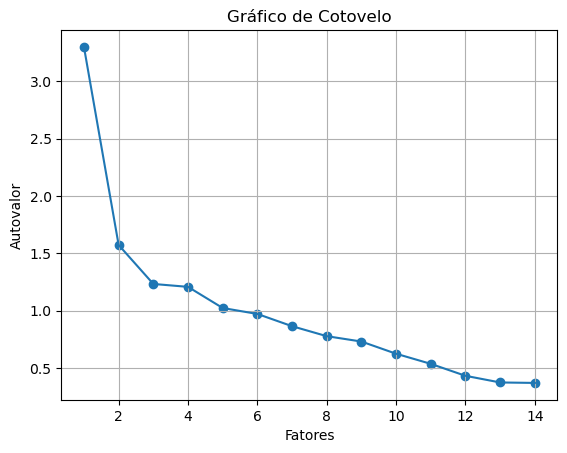

In [16]:
# Verificando os autovalores
eigen_values, vectors = fa.get_eigenvalues()
plt.scatter(range(1, df.shape[1]+1), eigen_values)
plt.plot(range(1, df.shape[1]+1), eigen_values)
plt.title('Gráfico de Cotovelo')
plt.xlabel('Fatores')
plt.ylabel('Autovalor')
plt.grid()
plt.show()

Interpretação do gráfico:

O gráfico de cotovelo ajuda a escolher o número de fatores na análise fatorial, buscando o ponto de inflexão ("cotovelo") onde ganhos adicionais de variância explicada se tornam marginais. No caso, após o segundo fator já não há mais uma grande variação, então usaremos 2 fatores.

In [17]:
# Realizando análise fatorial com 2 fatores 
fa = FactorAnalyzer(n_factors = 2, rotation = "varimax")
fa.fit(df)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [18]:
# Verificando a carga fatorial
loadings = fa.loadings_
print(loadings)

[[ 0.8129042  -0.14810539]
 [-0.1592608   0.66900916]
 [-0.30306196 -0.21137864]
 [ 0.49705572  0.04227859]
 [-0.04885171  0.41897751]
 [-0.01524411  0.28121975]
 [ 0.02065173  0.21755263]
 [ 0.09100628 -0.18171154]
 [ 0.51859867 -0.30376778]
 [-0.57849659  0.04143822]
 [-0.52344385  0.29713085]
 [ 0.43946925 -0.26823997]
 [-0.32580928  0.240978  ]
 [-0.36980701 -0.00347746]]


In [19]:
# Criando uma tabela para conseguir interpretar melhor o resutlado
df_loadings = pd.DataFrame({'Variável': df.columns, 'Fator1': loadings[:, 0], 'Fator2': loadings[:, 1]})

In [20]:
df_loadings

,Variável,Fator1,Fator2
0,output,0.812904,-0.148105
1,age,-0.159261,0.669009
2,sex,-0.303062,-0.211379
3,cp,0.497056,0.042279
4,trtbps,-0.048852,0.418978
5,chol,-0.015244,0.281220
6,fbs,0.020652,0.217553
7,restecg,0.091006,-0.181712
8,thalachh,0.518599,-0.303768
9,exng,-0.578497,0.041438


In [21]:
# Comunalidades 
communalities = fa.get_communalities()

In [22]:
# Criando uma tabela para conseguir interpretar melhor o resutlado
df_communalities = pd.DataFrame({'Variável': df.columns, 'Comunalidades': communalities})

In [23]:
df_communalities

,Variável,Comunalidades
0,output,0.682748
1,age,0.472937
2,sex,0.136527
3,cp,0.248852
4,trtbps,0.177929
5,chol,0.079317
6,fbs,0.047756
7,restecg,0.041301
8,thalachh,0.361219
9,exng,0.336375


Vamos analisar a saída e interpretá-la passo a passo:

**Cargas Fatoriais (Factor Loadings):**

Após treinar o analisador (fa.fit(df)), você pode obter as cargas fatoriais com fa.loadings_. As cargas fatoriais indicam a relação linear entre cada variável e o fator. Uma carga fatorial alta (em valor absoluto) indica que a variável está fortemente relacionada com o fator. O sinal da carga fatorial indica a direção da relação.

**Valores Próprios (Eigenvalues):**

Você pode verificar os valores próprios com fa.eigenvalues_. Eles representam a quantidade de variação explicada por cada fator. Comumente, um critério chamado "critério de Kaiser" é usado, onde apenas fatores com valores próprios próximos de 1 são considerados significativos. No entanto, essa é apenas uma heurística e outras técnicas, como a análise do gráfico de cotovelo, também podem ser usadas.

**Variação Explicada:**

Isso indica a proporção da variação total nos dados que é explicada pelos fatores extraídos. Geralmente, em análises fatoriais, buscamos um conjunto menor de fatores que ainda capture uma boa proporção da variação total nos dados.

**Rotação:**

A rotação é uma técnica usada para tornar a saída da análise fatorial mais interpretável. A rotação Varimax tenta maximizar a variação das cargas fatoriais, tornando algumas cargas fatoriais o mais próximo possível de 0 e outras o mais próximo possível de 1 ou -1. Isso torna mais fácil identificar quais variáveis estão associadas a quais fatores.

**Scores Fatoriais:**

Após treinar o analisador, você pode usar fa.transform(df) para obter os scores fatoriais para cada observação em seu conjunto de dados. Os scores fatoriais representam a pontuação de cada observação em cada fator.

**Comunalidades (Communalities):**

As comunalidades, que podem ser acessadas com fa.get_communalities(), representam a proporção da variação em cada variável que é explicada pelos fatores. Um valor próximo de 1 indica que a variável é bem explicada pelos fatores, enquanto um valor próximo de 0 indica o contrário.

### <font color='blue'>Conclusão

<h3>Fator 1 - "Força do Coração":</h3>

Imagine este fator como uma medida da capacidade do seu coração de funcionar bem, especialmente durante atividades físicas.

* **`output` (0.81):** `output` indica a probabilidade de ter uma doença cardíaca. Uma carga alta aqui significa que esse fator está diretamente ligado à saúde do coração. Quanto maior o valor neste fator, maior a chance de doença cardíaca.
* **`thalach` (0.52):** Frequência cardíaca máxima durante o exercício. Quanto maior, melhor a capacidade do coração.
* **`exng` (-0.58):** Dor no peito durante exercício. Se você sente dor, seu coração pode não estar funcionando tão bem. Por isso a carga é negativa: mais dor, menor "força do coração".
* **`oldpeak` (-0.52):** Uma medida de quanto o eletrocardiograma muda durante o exercício. Mudanças maiores podem indicar problemas no coração.
* **`slp` (0.44):** Outra medida do eletrocardiograma. Valores mais altos geralmente são melhores.
* **`ca` (-0.33):** Número de vasos sanguíneos bloqueados. Quanto mais bloqueados, pior para o coração.
* **`thal` (-0.37):** Resultado de um exame específico. Valores mais baixos podem indicar problemas.

<h3>Fator 2 - "Risco Cardíaco":</h3>

Este fator representa o seu risco geral de desenvolver problemas cardíacos, considerando fatores comuns.

* **`age` (0.67):** Idade. Quanto mais velho, maior o risco.
* **`trtbps` (0.42):** Pressão arterial. Pressão alta é ruim para o coração.
* **`chol` (0.28):** Colesterol. Níveis altos aumentam o risco.
* **`fbs` (0.22):** Açúcar no sangue. Níveis altos são ruins.
* **`restecg` (-0.18):** Resultado de um eletrocardiograma em repouso.
* **`oldpeak` (0.30):** Apesar de estar ligado à "força do coração", também influencia o risco geral.
* **`slp` (-0.27):** Assim como o `oldpeak`, também tem um papel no risco.
* **`ca` (0.24):** Vasos bloqueados aumentam o risco.


<h3>Em resumo:</h3>

O Fator 1 ("Força do Coração") mostra como seu coração funciona, e o Fator 2 ("Risco Cardíaco") mostra sua predisposição a problemas, considerando fatores como idade, pressão arterial e colesterol. Valores mais altos no Fator 1 são *bons*, enquanto valores mais altos no Fator 2 são *ruins*.

### <font color='blue'>Sistema e Versões dos Pacotes</font>

In [24]:
%reload_ext watermark
%watermark -v -m
%watermark --iversions

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.25.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 186 Stepping 3, GenuineIntel
CPU cores   : 12
Architecture: 64bit

matplotlib     : 3.8.4
pandas         : 2.2.2
numpy          : 1.26.4
factor_analyzer: 0.5.1
seaborn        : 0.13.2

